In [1]:
using CairoMakie
using SpecialFunctions

# This notebook covers the setup of the filament

In [2]:
include("src/parameters.jl")
include("src/filament_state.jl")

Ri_min (generic function with 1 method)

In [13]:
# Get the parameters
sp = create_simulation_parameters(Ri=0.6, Ro=2)
xs = range(-5sp.L, 5sp.L, 1024)
zs = range(-sp.Lz, 0, 128);

┌ Info: Created simulation parameters
│ Input:
│  Ro=2
│  Ri=0.6
│  Ek=nothing
│  α=0.25
│  λ=0.05
│  δ=-0.25
│ Output:
│  L=1
│  f=1
│  H=0.1
│  δH=-0.025
│  N₀=10.226244443222717
│  Nb=3.9040527740357063
│  ℓ=0.25
│  ν=nothing
└  Lz=0.25


In [8]:
maximum([square_curvature(x, -0.25, 1) for x in range(-3, 3, 1000)])

0.4965583499938475

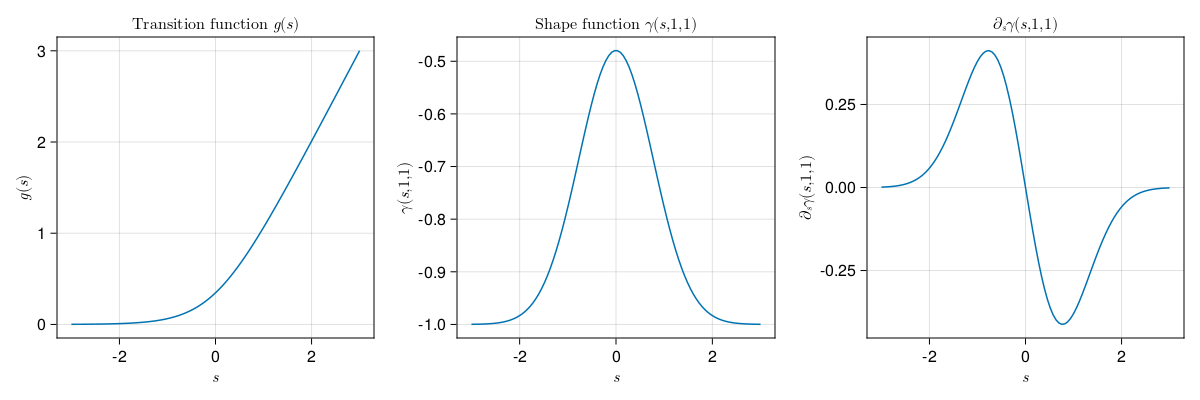

In [20]:
fig = Figure(; resolution=(1200, 400))
ax1 = Axis(fig[1, 1]; title=L"\text{Transition function }g(s)", xlabel=L"s", ylabel=L"g(s)")
ax2 = Axis(fig[1, 2]; title=L"\text{Shape function }\gamma(s, 1, 1)", xlabel=L"s", ylabel=L"\gamma(s, 1, 1)")
ax3 = Axis(fig[1, 3]; title=L"\partial_s \gamma(s, 1, 1)", xlabel=L"s", ylabel=L"\partial_s \gamma(s, 1, 1)")
lines!(ax1, range(-3, 3, 100), g)
lines!(ax2, range(-3, 3, 100), s->γ(s, 1, 1))
lines!(ax3, range(-3, 3, 100), s->∂γ∂s(s, 1, 1))
fig

In [21]:
(filament_b, filament_v) = get_filament_state(sp)

[ Info: Filament state created: Ro=0.9999810500210538, Ro_min=0.958435203595398, Fr₀=0.1436219316890833, Frb=0.5122737442070403


(b = var"#b#8"{Float64, Float64, Float64, Float64, var"#filament_h#6"{Float64, Float64, Float64, Float64}}(0.1, 6.962592956804397, 1.9520443148398055, 0.05, var"#filament_h#6"{Float64, Float64, Float64, Float64}(0.25, 0.1, -0.25, 0.25)), v = var"#v#9"{Float64, Float64, Float64, Float64, Int64, var"#filament_∂xh#7"{Float64, Float64, Float64, Float64}, var"#filament_h#6"{Float64, Float64, Float64, Float64}}(0.1, 6.962592956804397, 1.9520443148398055, 0.05, 1, var"#filament_∂xh#7"{Float64, Float64, Float64, Float64}(0.25, 0.1, -0.25, 0.25), var"#filament_h#6"{Float64, Float64, Float64, Float64}(0.25, 0.1, -0.25, 0.25)))

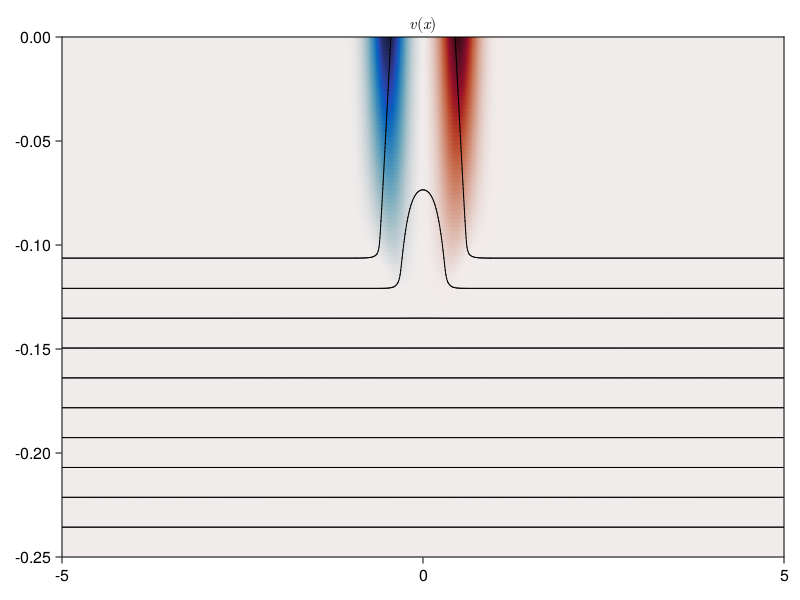

In [22]:
fig = Figure(; resolution=(800, 600))
ax1 = Axis(fig[1, 1]; title=L"v(x)", limits=(xs[1], xs[end], zs[1], zs[end]))
heatmap!(ax1, xs, zs, filament_v; colormap=:balance)
contour!(ax1, xs, zs, filament_b; levels=10, color=:black)
fig

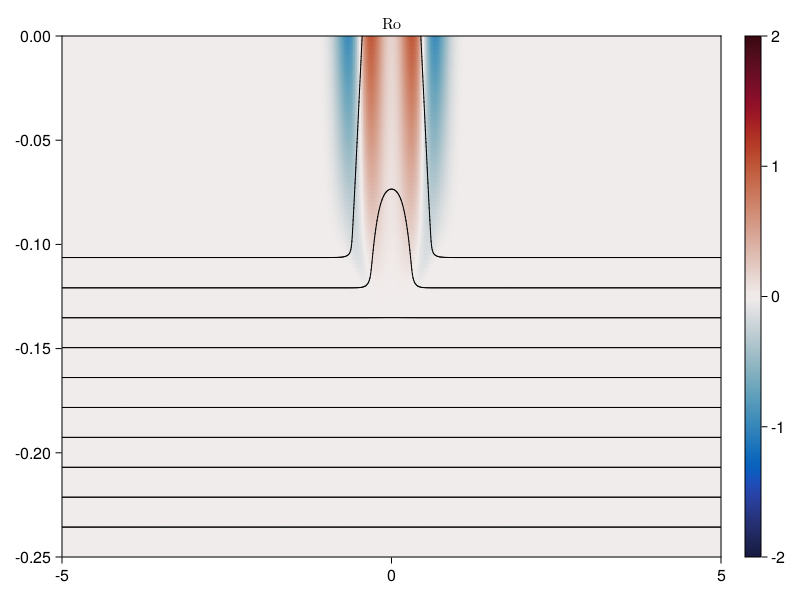

In [23]:
# Plot of the local Rossby number
filament_ζ(x, z) = (filament_v(x + 0.001, z) - filament_v(x - 0.001, z)) / 0.002

fig = Figure(; resolution=(800, 600))
ax1 = Axis(fig[1, 1]; title=L"\text{Ro}", limits=(xs[1], xs[end], zs[1], zs[end]))
ht = heatmap!(ax1, xs, zs, filament_ζ; colormap=:balance, colorrange=(-2sp.Ro, 2sp.Ro))
contour!(ax1, xs, zs, filament_b; levels=10, color=:black)
Colorbar(fig[1, 2], ht)
fig

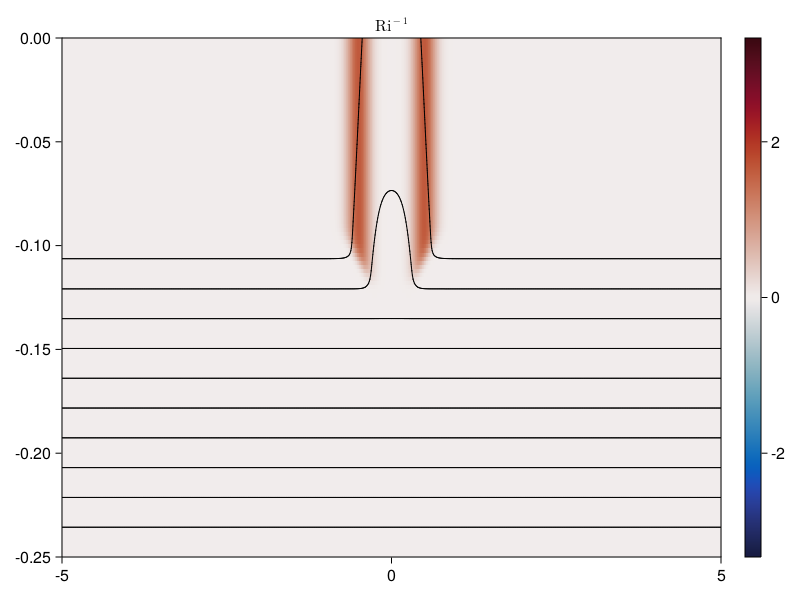

In [33]:
# Plot of the local Richardson number
filament_∂v∂z(x, z) = (filament_v(x, z + 0.001) - filament_v(x, z - 0.001)) / 0.002
filament_∂b∂z(x, z) = (filament_b(x, z + 0.001) - filament_b(x, z - 0.001)) / 0.002
filament_Ri(x, z) = (filament_∂b∂z(x, z) / (filament_∂v∂z(x, z))^2)^(-1)

fig = Figure(; resolution=(800, 600))
ax1 = Axis(fig[1, 1]; title=L"\text{Ri}^{-1}", limits=(xs[1], xs[end], zs[1], zs[end]))
ht = heatmap!(ax1, xs, zs, filament_Ri; colormap=:balance, colorrange=(-2/sp.Ri, 2/sp.Ri))
contour!(ax1, xs, zs, filament_b; levels=10, color=:black)
Colorbar(fig[1, 2], ht)
fig